<a href="https://colab.research.google.com/github/therealellam/CORE_ML_WK4/blob/main/DSP_CORE_MOD2_IP_WK4_ML_Bellah_Ellam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Defining the Question**


>  # a) Specifying the Question



This week's project requires us to implement a K-nearest neighbor (kNN) classifier  and a Naive Bayes classifier. Once we conduct the experiments, we will calculate the resulting metrics

> # b) Metrics for Success



Experimental Procedure:

- For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.
- For dataset 2, perform classification of the testing set samples using the Naive Bayes Classifier.

Compute the accuracy (percentage of correct classification).

Report the confusion matrix of each classifier.

Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.

Suggest and apply at least one of the optimization techniques that you learned earlier this week.

Provide further recommendations to improve both classifiers.
Create a notebook for each project. 

> # c) Data Relevance

The dataset to use for this project can be found by following these links:. 

Download the two datasets from the given links:
- Dataset 1 Source: [Train Dataset Source: Link (Links to an external site.), Test Dataset Source: Link (Links to an external site.)]
- Dataset 2 Source: [Link (Links to an external site.)]

# **2. Importing Libraries**

In [1]:
#We first import python libraries we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **3. Loading the Dataset**

In [2]:
#Load the Data into a dataframe
#The dataset used in this project was provided  

df=pd.read_csv('/content/train (5).csv')

#Viewing the first 5 entries
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **4. Checking the Data**

In [3]:
# Determining the no. of records in the dataset
df.shape

(891, 12)

In [4]:
# Checking whether each column has an appropriate datatype
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Dataframe description

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **5. Tidying the Dataset**

In [6]:
#Checking for Missing Values

df.isnull().values.any()

True

In [7]:
# Dealing with the Missing Data

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
#Dropping cabin column since it has 77.1% missing values

df.drop(columns='Cabin', inplace= True)

In [16]:
#replacing the missing values in the Age column with the median Age
df['Age']=df['Age'].fillna(df['Age'].median())

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [19]:
df = df.dropna(axis=0)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# **7. Checking for & Removing Duplicates**

In [8]:
#checking data for duplicates
df.duplicated().values.any()

False

In [9]:
# df.duplicated().sum()

0

In [ ]:
#Dropping Duplicates

# df.drop_duplicates(keep=False,inplace=True)

# df.duplicated().values.any()


# **EXPLORATORY ANALYSIS**

# **Univariate Analysis - Categorical Variables**

In [22]:
#Frequency Tables

print("Survived Column Frequency table")
display(df.Survived.value_counts())
print('')

print("Pclass Column Frequency table")
display(df.Pclass.value_counts())
print('')


Survived Column Frequency table


0    549
1    340
Name: Survived, dtype: int64


Pclass Column Frequency table


3    491
1    214
2    184
Name: Pclass, dtype: int64

In [23]:
#Importing the seaborn library for visualization

import seaborn as sns

#setting a style

sns.set(style='whitegrid', palette='muted', color_codes=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency Table of survival column')

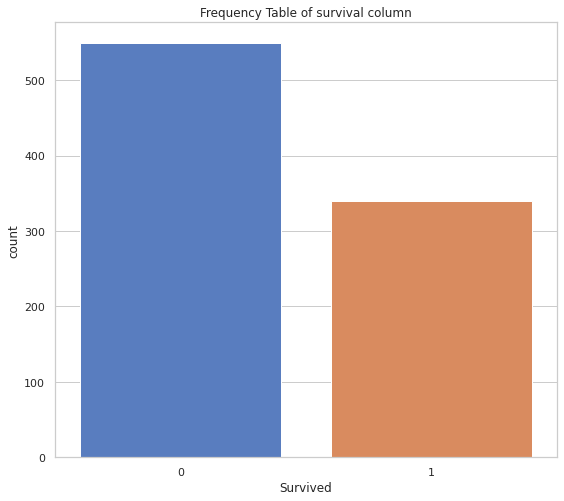

In [26]:
#plotting the Survived column
plt.figure(figsize=(9, 8))
sns.countplot(df.Survived)
plt.title('Frequency Table of survival column')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Frequency Table of Passenger Class column')

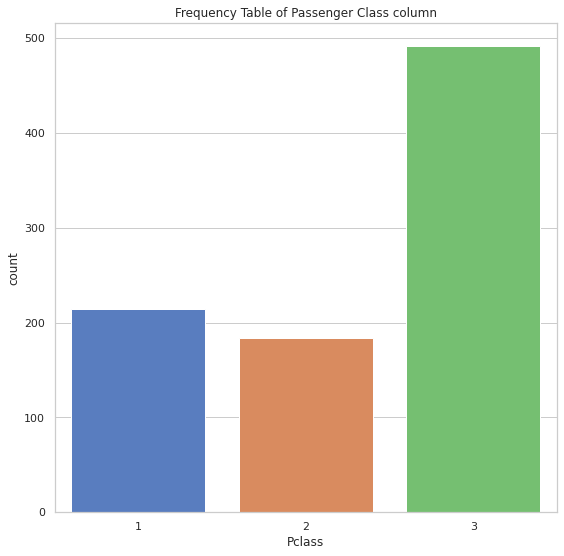

In [28]:
#plotting the grade column
plt.figure(figsize=(9, 9))
sns.countplot(df.Pclass)
plt.title('Frequency Table of Passenger Class column')

Many passengers were in class 3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


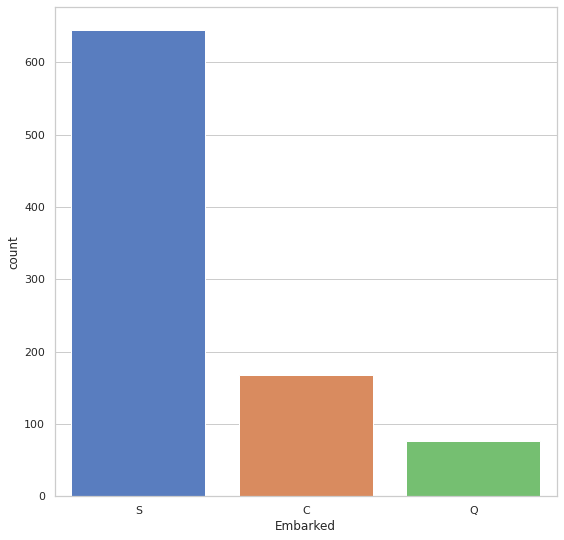

In [30]:
#plotting the grade column
plt.figure(figsize=(9, 9))
sns.countplot(df.Embarked)


# **Numerical variables**

In [21]:
pd.unique(df['Sex'])

array(['male', 'female'], dtype=object)

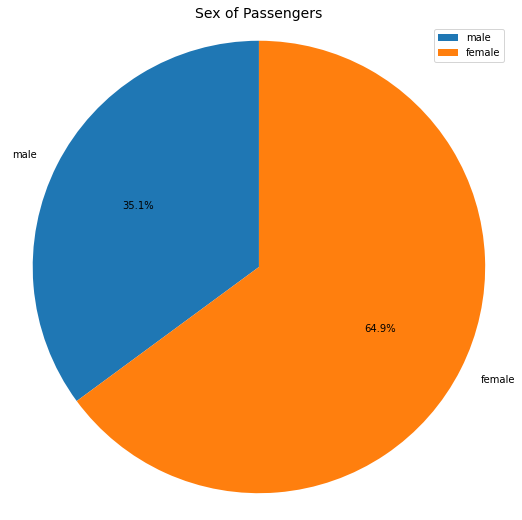

In [20]:
tp = df['Sex'].unique()
count = df.groupby(['Sex'])["PassengerId"].count()

plt.figure(figsize=(9,9))
plt.pie(count, labels = tp, autopct = '%1.1f%%', shadow = False, startangle = 90)
plt.axis('equal')
plt.legend()
plt.title('Sex of Passengers', fontsize=14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

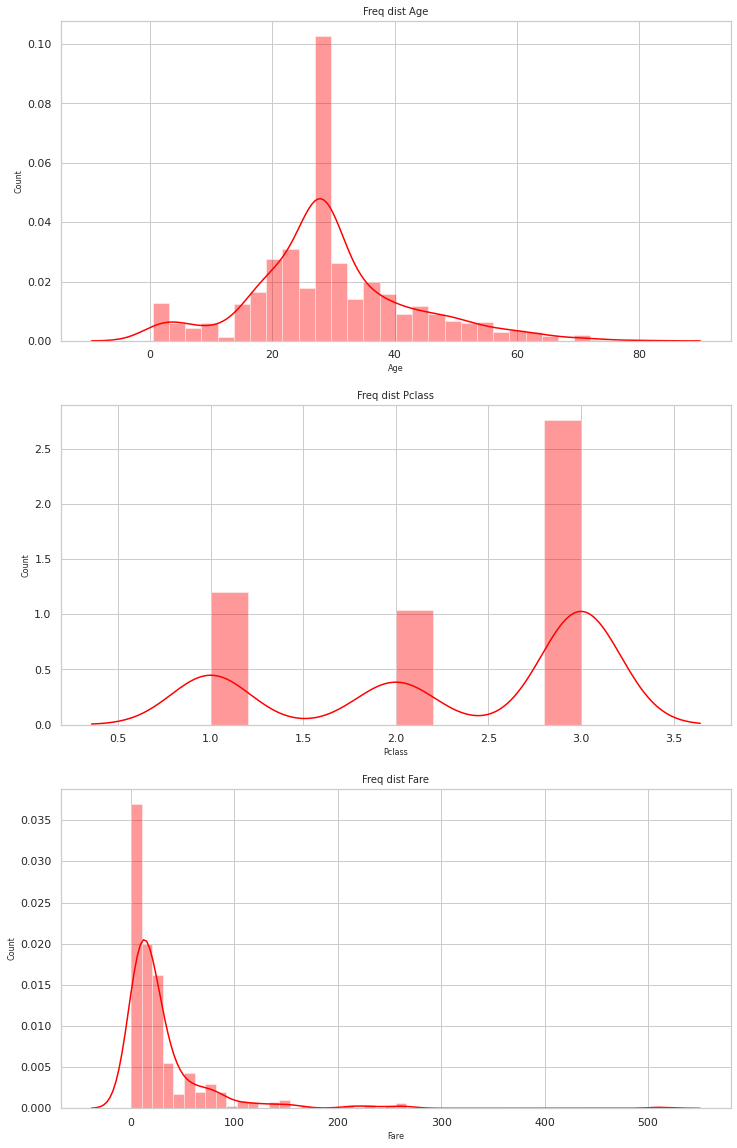

In [34]:
#Analyzing numerical columns

col_names = ['Age','Pclass','Fare']

fig, ax = plt.subplots(len(col_names), figsize=(12,20))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i],color= 'red')
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    

plt.show()

# **Bivariate Analysis**

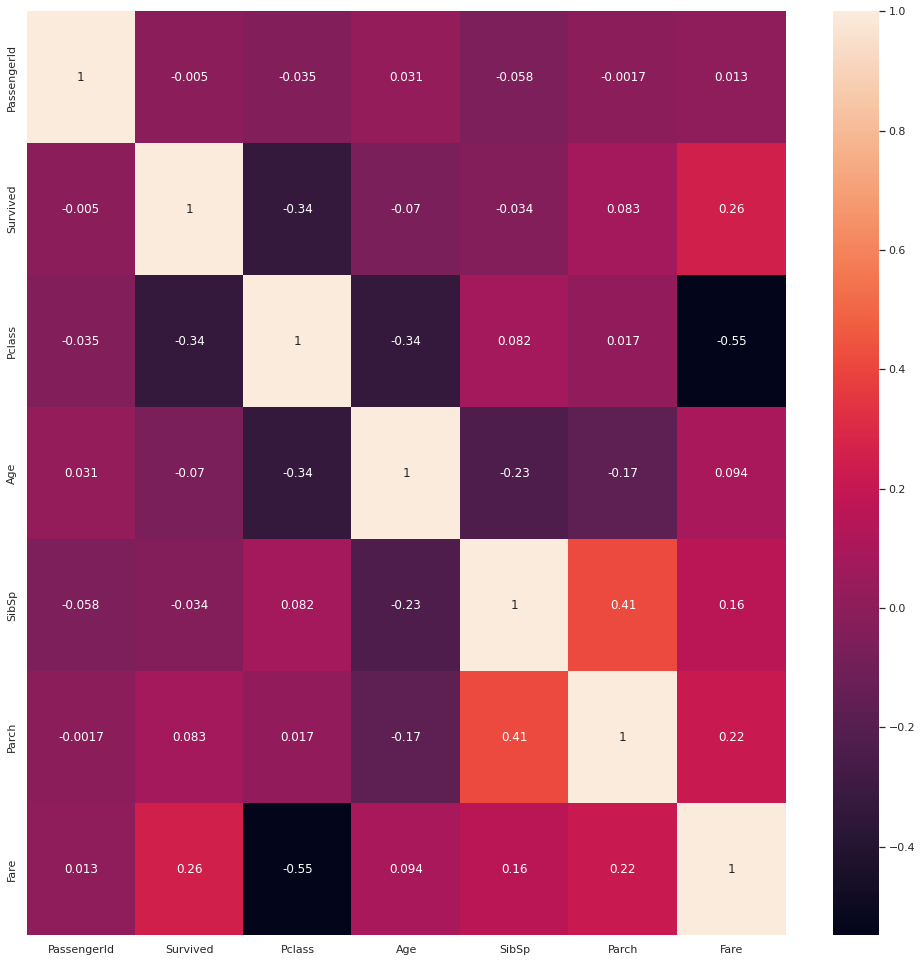

In [35]:
#Checking varibale correlation

plt.figure(figsize=(17,17))
sns.heatmap(df.corr(), annot=True)
plt.show()

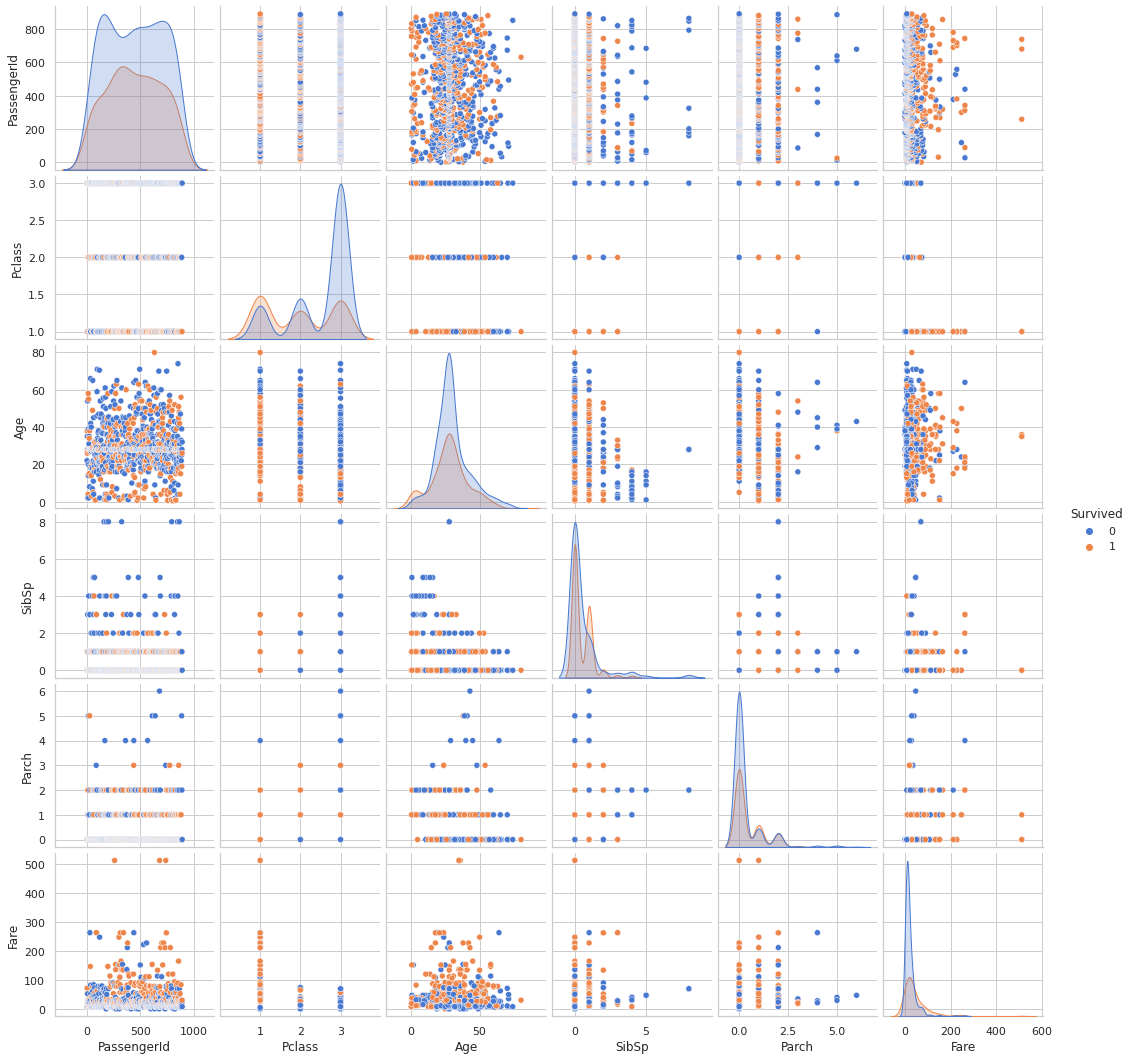

In [38]:
#Relationship btn Categorical & Numerical variables

sns.pairplot(df,hue='Survived')
plt.show()

#**Modelling**

In [39]:
# Splitting our dataset into Test & Train
# -----
# 
X = df[['Age','Pclass','SibSp', 'Parch', 'Fare']]
y = df['Survived']

# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [40]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
# The final step is to make predictions on our test data
#
y_pred = classifier.predict(X_test)

In [43]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[96 14]
 [30 38]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       110
           1       0.73      0.56      0.63        68

    accuracy                           0.75       178
   macro avg       0.75      0.72      0.72       178
weighted avg       0.75      0.75      0.74       178



# **INSIGHTS FOR IMPROVEMENT**

1. Plotting for Mulivariate regression proved to be a problem